In [7]:
"""
This code is designed to be a quick example of the scresonators package. It will use data hosted on 
the scresonators github to perform a fit and output the results to a local file. Just put this
file in the same directory as your clone of the scresonators repo and run it.

i.e. `python plug_and_play.py`
"""

%load_ext autoreload
%autoreload 2

import sys  # update paths
import os  # import os in order to find relative path
import glob
import requests

path_to_resfit = '/Users/sph/Library/CloudStorage/GoogleDrive-spharvey3@gmail.com/My Drive/Schuster/Code/Git/scresonators/'
sys.path.append(path_to_resfit)

import fit_resonator.resonator as scres

#import importlib 
#importlib.reload(scres)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:

# Load sample resonator data into a local file
directory = os.getcwd()
filename = directory + '/' + 'scres_example.csv'
# data BOE 230325 4 4p513GHz -15dB 13mK
url = 'https://raw.githubusercontent.com/Boulder-Cryogenic-Quantum-Testbed/scresonators/master/fit_resonator/Resources/sample_data.csv'
r = requests.get(url).content.decode('utf-8')
f = open(filename,'w')
f.write(r)
f.close()


In [9]:
os.getcwd()

'/Users/sph/Library/CloudStorage/GoogleDrive-spharvey3@gmail.com/My Drive/Schuster/Code/Git/scresonators/fit_resonator/samples'

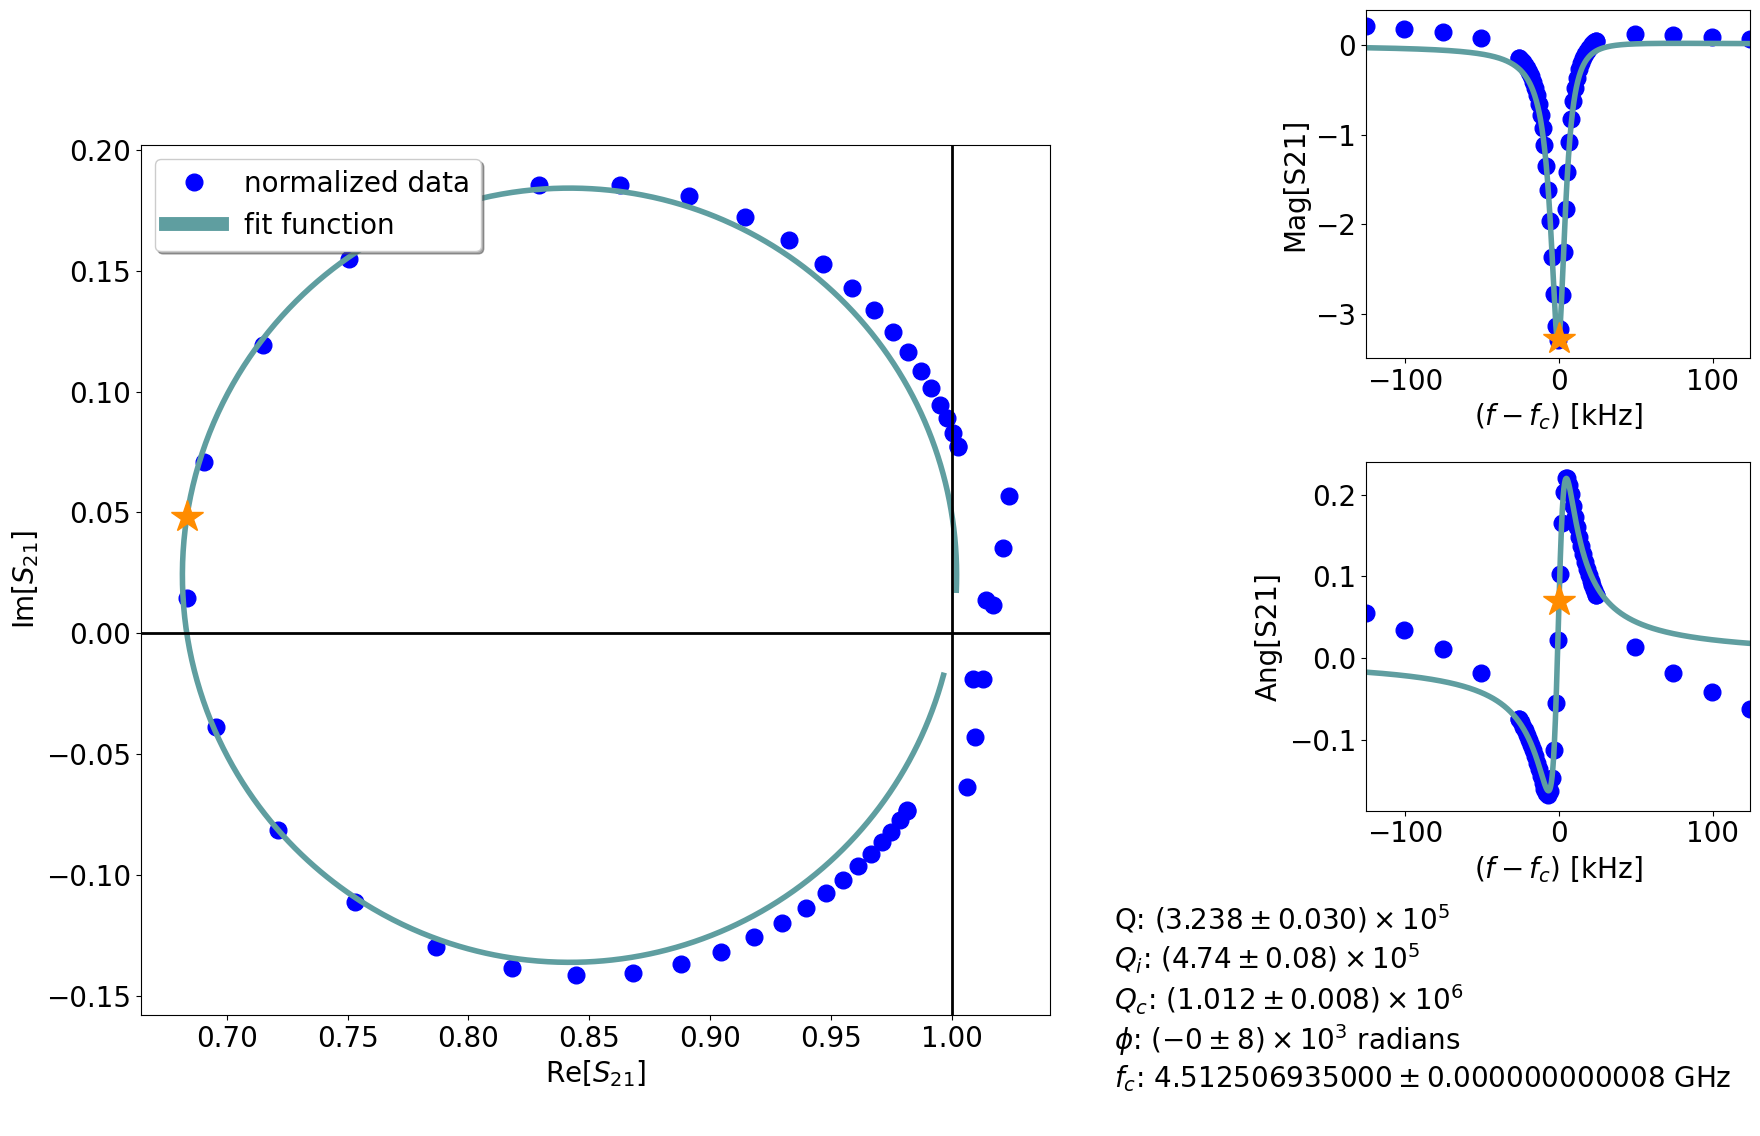

In [10]:

# Create resonator object from the sample data
my_resonator = scres.Resonator()
# my_resonator.from_file(filepath=filename, measurement='S21')
my_resonator.from_file(filepath='scres_example.csv')

# Set fit parameters
fit_type = 'DCM'
MC_iteration = 10
MC_rounds = 1e3
MC_fix = []
manual_init = None
my_resonator.preprocess_method = 'linear' # Preprocess method: default = linear
my_resonator.filepath = './' # Path to fit output

# Perform a fit on the data with given parameters
my_resonator.fit_method(fit_type, MC_iteration, MC_rounds=MC_rounds, MC_fix=MC_fix,manual_init=manual_init, MC_step_const=0.3)
ouput = my_resonator.fit('png')

# Remove sample data
os.remove(filename) 


In [15]:
# Q, Qc, Frequency, 
print(ouput[0])
print(ouput[1])
print(ouput[2])
print(ouput[3])

[323855.2412474512, 1011718.9193037235, 4512506935.207796, -0.1507735470820062]
[2850.183938569564, 7934.617684025841, 8074.261541738291, 8166.913668979658, 0.008088962540666794, 63.184268951416016]
0.000571929992727625
[334646.21309866454, 1038274.77124396, 4512507450.0, -0.14580984804745173]


In [ ]:
# conf_array = [Q_conf, Qi_conf, Qc_conf, Qc_Re_conf, phi_conf, w1_conf]

In [17]:
os.getcwd()

'/Users/sph/Library/CloudStorage/GoogleDrive-spharvey3@gmail.com/My Drive/Schuster/Code/Git/scresonators/fit_resonator/samples'

[168.39862707609245, 6901.206662839642, 187.90901028850203, 197.1818007208276, 0.00994480804754666, 1851.3531684875488]


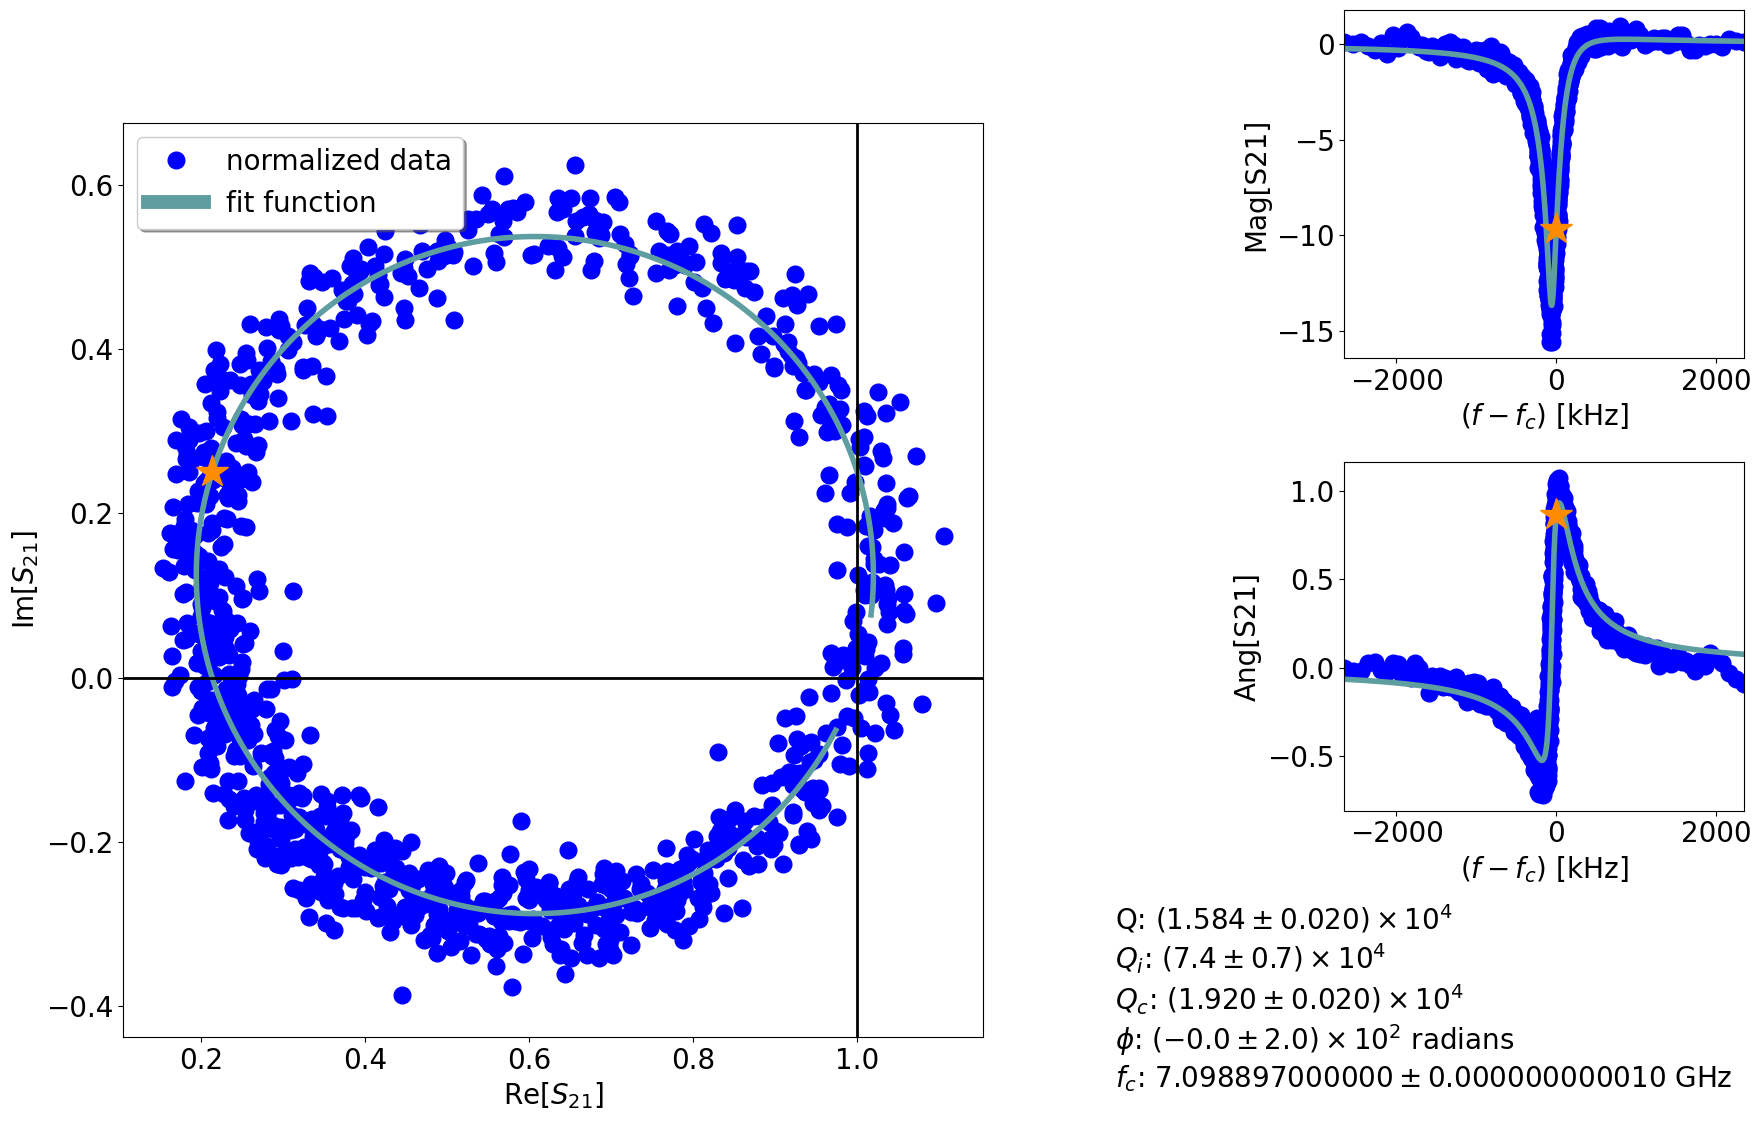

In [36]:
pth = '/Users/sph/Library/CloudStorage/GoogleDrive-spharvey3@gmail.com/My Drive/Schuster/Code/Git/'

my_resonator = scres.Resonator()
# my_resonator.from_file(filepath=filename, measurement='S21')
my_resonator.from_file(filepath=pth + 'res_spec5.csv')

# Set fit parameters
fit_type = 'DCM'
MC_iteration = 10
MC_rounds = 1e3
MC_fix = []
manual_init = None
my_resonator.preprocess_method = 'linear' # Preprocess method: default = linear
my_resonator.filepath = './' # Path to fit output

# Perform a fit on the data with given parameters
my_resonator.fit_method(fit_type, MC_iteration, MC_rounds=MC_rounds, MC_fix=MC_fix,manual_init=manual_init, MC_step_const=0.3)
ouput = my_resonator.fit('png')

# Remove sample data
#os.remove(filename) 

print(ouput[1])
# conf_array = [Q_conf, Qi_conf, Qc_conf, Qc_Re_conf, phi_conf, w1_conf]